<a href="https://colab.research.google.com/github/VynLavenda/Analyst-Sales-of-Walmart/blob/main/Sales%20of%20Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISA PENJUALAN MINGGUAN WALMART**

**UAS DATA ANALYTICS**

**Nama :**    Evelyn

**NIM :** 36230029

**Mata Kuliah :** Data Analytics

**Dosen Pengampu :** Eko Wahyu

#WALMART DATASET

Raw Data:

https://raw.githubusercontent.com/MainakRepositor/Datasets/refs/heads/master/walmart.csv

In [ ]:
import os
os.system('pip install --quiet --extra-index-url=https://pypi.nvidia.com \
  cudf-cu12==24.10.* \
  dask-cudf-cu12==24.10.* \
  cuml-cu12==24.10.* \
  cugraph-cu12==24.10.*')

0

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/MainakRepositor/Datasets/refs/heads/master/walmart.csv"

df = pd.read_csv(url)

df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,05-02-2010,False,1.0,24924.50,42.31,2.572,211.096358,8.106,A,151315
1,2,1,05-02-2010,False,26.0,11737.12,42.31,2.572,211.096358,8.106,A,151315
2,3,1,05-02-2010,False,17.0,13223.76,42.31,2.572,211.096358,8.106,A,151315
3,4,1,05-02-2010,False,45.0,37.44,42.31,2.572,211.096358,8.106,A,151315
4,5,1,05-02-2010,False,28.0,1085.29,42.31,2.572,211.096358,8.106,A,151315


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    423325 non-null  int64  
 1   Store         423325 non-null  int64  
 2   Date          423325 non-null  object 
 3   IsHoliday     423325 non-null  bool   
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   423325 non-null  float64
 7   Fuel_Price    423325 non-null  float64
 8   CPI           422740 non-null  float64
 9   Unemployment  422740 non-null  float64
 10  Type          423325 non-null  object 
 11  Size          423325 non-null  int64  
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 35.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,423325.00000,423325.000000,421570.000000,421570.000000,423325.000000,423325.000000,422740.000000,422740.000000,423325.000000
mean,211663.00000,22.203860,44.260317,15981.258123,60.067140,3.361933,171.218863,7.957296,136701.215794
std,122203.54569,12.786244,30.492054,22711.183519,18.452599,0.458038,39.167088,1.863433,60990.977801
min,1.00000,1.000000,1.000000,-4988.940000,-7.290000,2.472000,126.064000,3.684000,34875.000000
25%,105832.00000,11.000000,18.000000,2079.650000,46.670000,2.935000,132.022667,6.891000,93638.000000
50%,211663.00000,22.000000,37.000000,7612.030000,62.070000,3.452000,182.350989,7.866000,140167.000000
75%,317494.00000,33.000000,74.000000,20205.852500,74.260000,3.738000,212.512605,8.567000,202505.000000
max,423325.00000,45.000000,99.000000,693099.360000,101.950000,4.468000,228.976456,14.313000,219622.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Store,0
Date,0
IsHoliday,0
Dept,1755
Weekly_Sales,1755
Temperature,0
Fuel_Price,0
CPI,585
Unemployment,585


In [ ]:
df['Weekly_Sales'] = df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean())
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].median())
df['Dept'] = df['Dept'].fillna(df['Dept'].mode()[0])

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
IsHoliday,0
Dept,0
Weekly_Sales,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Type,0


# DATA VISUALIZATION

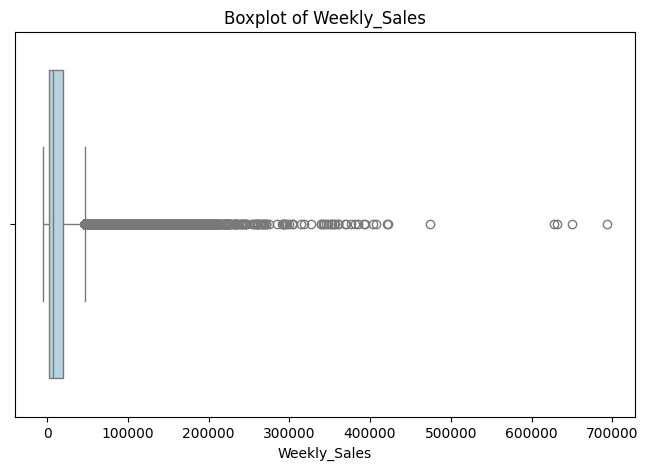

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weekly_Sales'], color='lightblue')
plt.title("Boxplot of Weekly_Sales")
plt.show()

In [ ]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Weekly_Sales'] = df['Weekly_Sales'].clip(lower=lower_bound, upper=upper_bound)

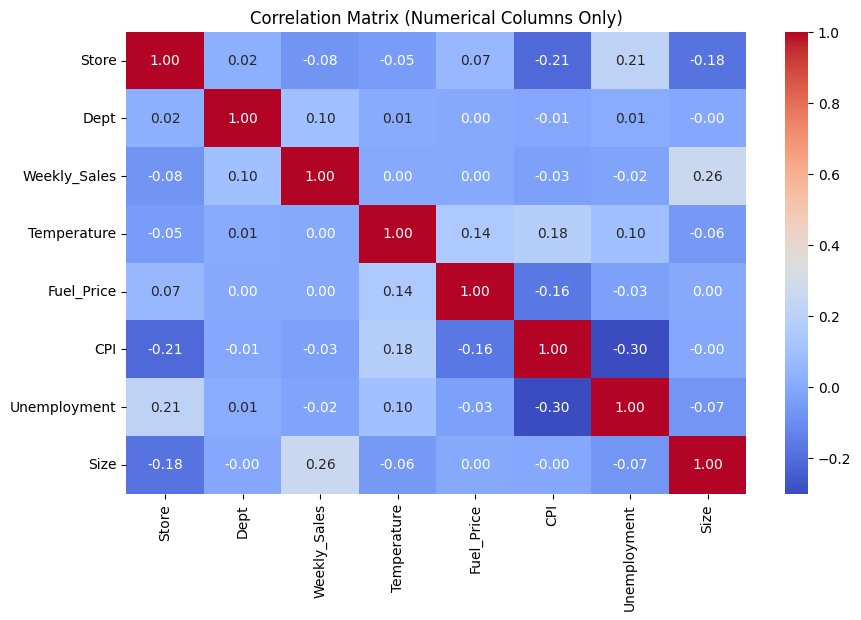

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()

In [ ]:
df_cleaned = df.drop(columns=['Fuel_Price', 'Temperature'])

print("Kolom yang tersisa setelah penghapusan:")
print(df_cleaned.columns)

Kolom yang tersisa setelah penghapusan:
Index(['Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')


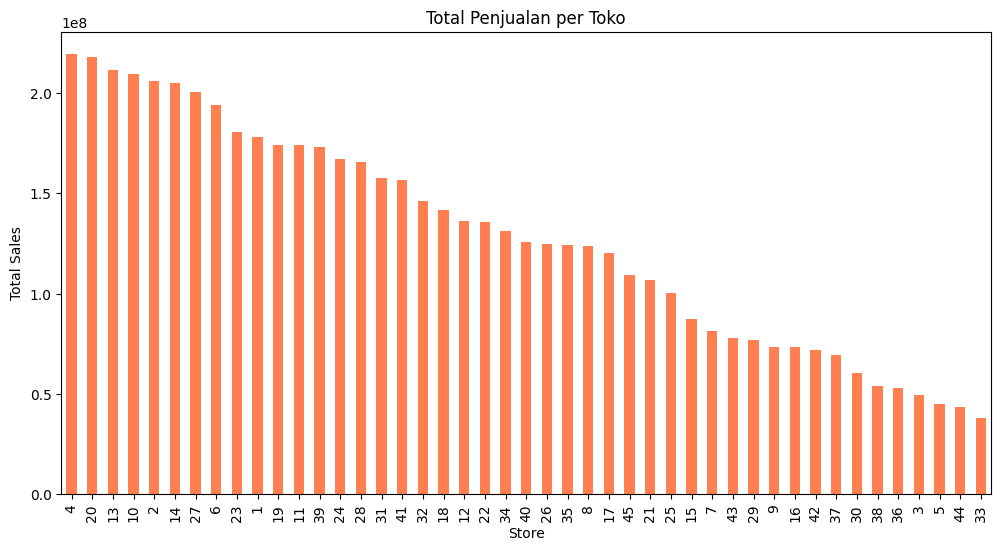

In [ ]:
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar', color='coral')
plt.title("Total Penjualan per Toko")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

<ipython-input-14-3c202b755cee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='Set2')


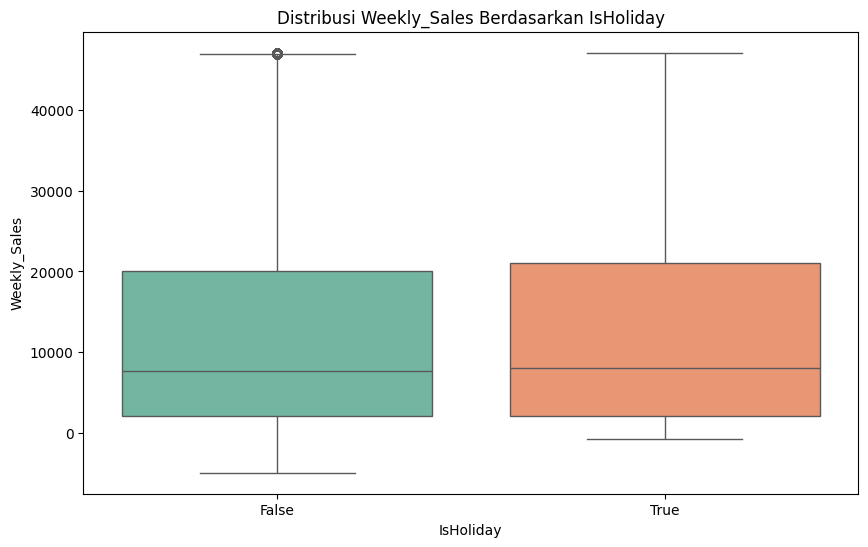

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='Set2')
plt.title("Distribusi Weekly_Sales Berdasarkan IsHoliday")
plt.show()

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

holiday_sales = df[df['IsHoliday'] == 1]['Weekly_Sales'].mean()
non_holiday_sales = df[df['IsHoliday'] == 0]['Weekly_Sales'].mean()

print(f"Rata-rata penjualan saat liburan: {locale.currency(holiday_sales, grouping=True)}")
print(f"Rata-rata penjualan saat tidak liburan: {locale.currency(non_holiday_sales, grouping=True)}")

Rata-rata penjualan saat liburan: $13,990.41
Rata-rata penjualan saat tidak liburan: $13,612.60


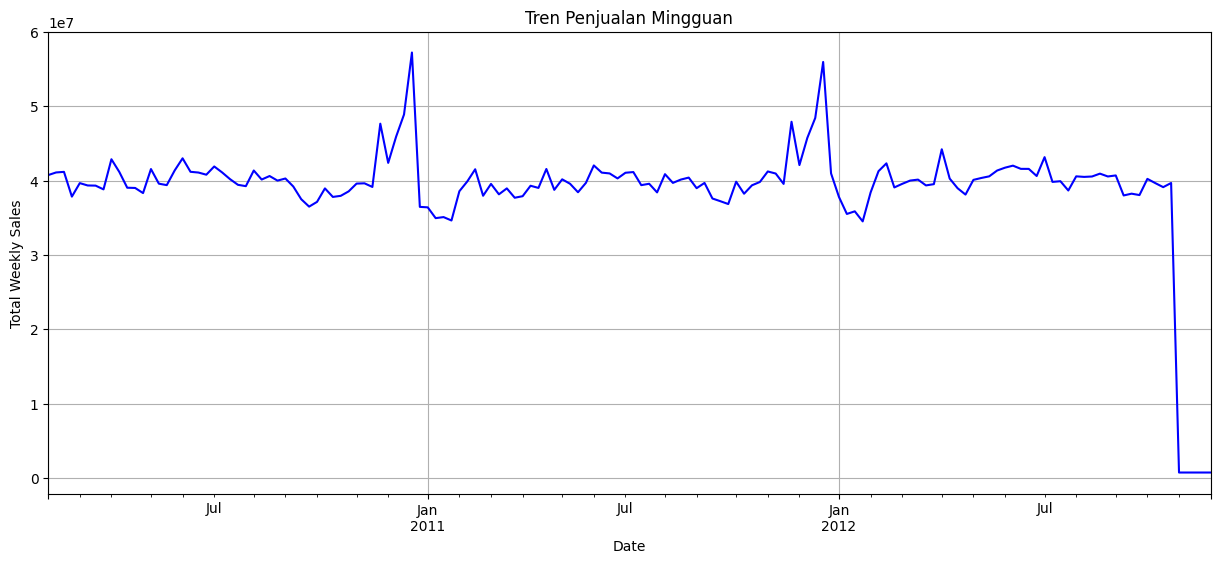

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
filtered_df = df[(df['Date'] < '2012-12-01') & (df['Date'].dt.year != 2013)]
weekly_sales_trend = filtered_df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(15, 6))
weekly_sales_trend.plot(color='blue')
plt.title("Tren Penjualan Mingguan")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid()
plt.show()

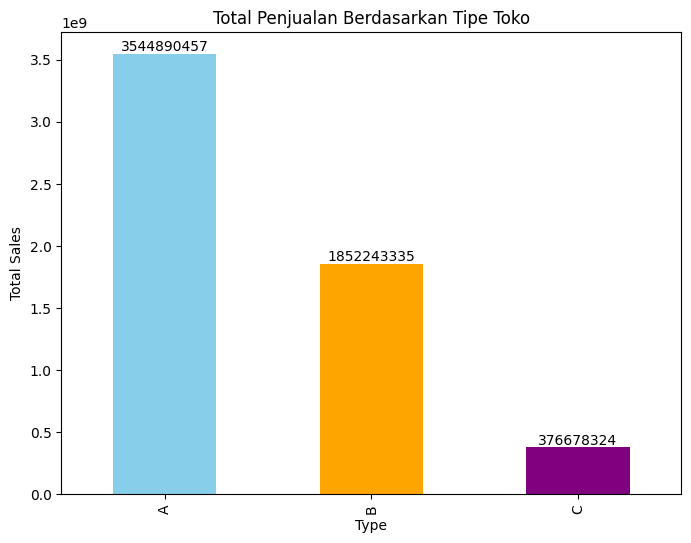

In [ ]:
sales_by_type = df.groupby('Type')['Weekly_Sales'].sum()

plt.figure(figsize=(8, 6))
sales_by_type.plot(kind='bar', color=['skyblue', 'orange', 'purple'])

for index, value in enumerate(sales_by_type):
    plt.text(index, value, f"{value:.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Total Penjualan Berdasarkan Tipe Toko")
plt.xlabel("Type")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
stores_per_type = df.groupby('Type')['Store'].nunique()
print("Jumlah toko per tipe:")
print(stores_per_type)

Jumlah toko per tipe:
Type
A    22
B    17
C     6
Name: Store, dtype: int64


# EKSTRAKSI FITUR

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [ ]:
df

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,Day,Day_of_Week
0,1,2010-02-05,False,1.0,24924.500000,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4
1,1,2010-02-05,False,26.0,11737.120000,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4
2,1,2010-02-05,False,17.0,13223.760000,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4
3,1,2010-02-05,False,45.0,37.440000,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4
4,1,2010-02-05,False,28.0,1085.290000,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,False,1.0,15981.258123,76.05,3.639,171.218863,7.866,B,118221,2013,6,26,28,4
423321,45,2013-07-05,False,1.0,15981.258123,77.50,3.614,171.218863,7.866,B,118221,2013,7,27,5,4
423322,45,2013-07-12,False,1.0,15981.258123,79.37,3.614,171.218863,7.866,B,118221,2013,7,28,12,4
423323,45,2013-07-19,False,1.0,15981.258123,82.84,3.737,171.218863,7.866,B,118221,2013,7,29,19,4


In [ ]:
holiday_dates = [
    '2010-01-01', '2010-07-04', '2010-11-26', '2010-12-25',  # Tahun 2010
    '2011-01-01', '2011-07-04', '2011-09-05', '2011-11-25', '2011-12-25',  # Tahun 2011
    '2012-01-01', '2012-07-04', '2012-09-03', '2012-11-23', '2012-12-25'   # Tahun 2012
]

# Konversi kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Tandai apakah tanggal termasuk dalam daftar libur
df['IsHoliday'] = df['Date'].isin(pd.to_datetime(holiday_dates)).astype(int)

# Lihat hasilnya
print(df[['Date', 'IsHoliday']])

             Date  IsHoliday
0      2010-02-05          0
1      2010-02-05          0
2      2010-02-05          0
3      2010-02-05          0
4      2010-02-05          0
...           ...        ...
423320 2013-06-28          0
423321 2013-07-05          0
423322 2013-07-12          0
423323 2013-07-19          0
423324 2013-07-26          0

[423325 rows x 2 columns]


In [ ]:
df['Prev_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(1)
df['Rolling_Avg_Sales'] = df.groupby('Store')['Weekly_Sales'].rolling(4).mean().reset_index(0, drop=True)

In [ ]:
#Membuat kategori berdasarkan ukuran toko
bins = [0, 50000, 150000, 250000]
labels = ['Small', 'Medium', 'Large']
df['Store_Size_Category'] = pd.cut(df['Size'], bins=bins, labels=labels)

In [ ]:
df['Weekly_Sales'] = df['Weekly_Sales'].round()
df

,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,Day,Day_of_Week,Prev_Week_Sales,Rolling_Avg_Sales,Store_Size_Category
0,1,2010-02-05,0,1.0,24924.0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4,NaN,NaN,Large
1,1,2010-02-05,0,26.0,11737.0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4,24924.500000,NaN,Large
2,1,2010-02-05,0,17.0,13224.0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4,11737.120000,NaN,Large
3,1,2010-02-05,0,45.0,37.0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4,13223.760000,12480.705000,Large
4,1,2010-02-05,0,28.0,1085.0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,5,4,37.440000,6520.902500,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,0,1.0,15981.0,76.05,3.639,171.218863,7.866,B,118221,2013,6,26,28,4,15981.258123,15981.258123,Medium
423321,45,2013-07-05,0,1.0,15981.0,77.50,3.614,171.218863,7.866,B,118221,2013,7,27,5,4,15981.258123,15981.258123,Medium
423322,45,2013-07-12,0,1.0,15981.0,79.37,3.614,171.218863,7.866,B,118221,2013,7,28,12,4,15981.258123,15981.258123,Medium
423323,45,2013-07-19,0,1.0,15981.0,82.84,3.737,171.218863,7.866,B,118221,2013,7,29,19,4,15981.258123,15981.258123,Medium


In [ ]:
df = list(range(1000))  # Contoh list panjang
print(df)  # Bisa langsung print atau gunakan loop

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# SEBARAN TOKO

In [ ]:
store_size_dist = df['Store_Size_Category'].value_counts()
print(store_size_dist)

Store_Size_Category
Large     203549
Medium    146045
Small      73731
Name: count, dtype: int64


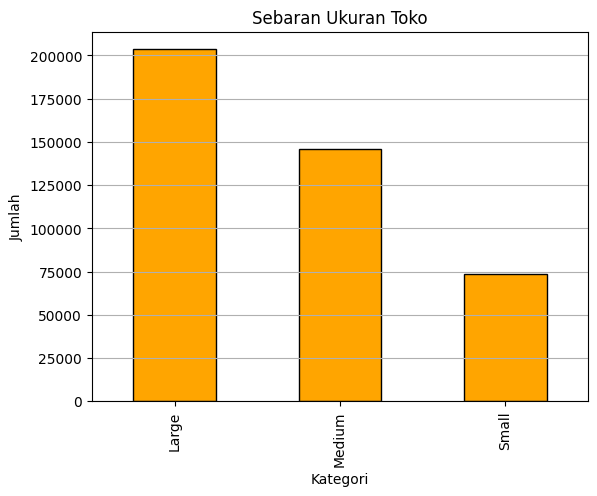

In [ ]:
store_size_dist.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Sebaran Ukuran Toko")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.grid(axis='y')
plt.show()

# ANALISA HASIL EKSTRASI FITUR

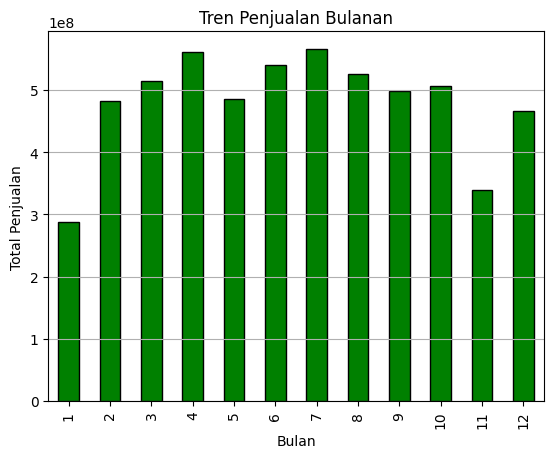

In [ ]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
monthly_sales.plot(kind='bar', color='green', edgecolor='black')
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Penjualan")
plt.grid(axis='y')
plt.show()

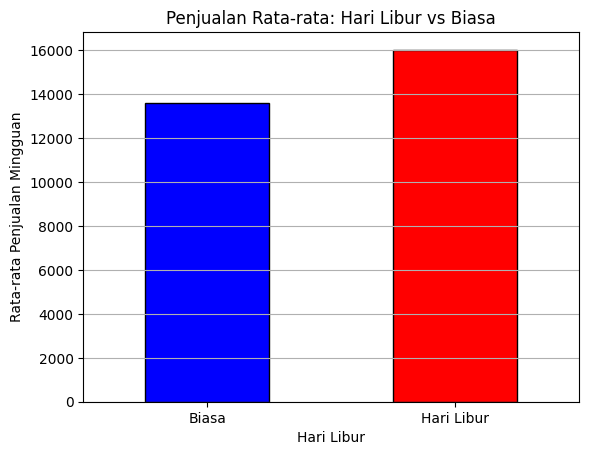

In [ ]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', color=['blue', 'red'], edgecolor='black')
plt.title("Penjualan Rata-rata: Hari Libur vs Biasa")
plt.xlabel("Hari Libur")
plt.ylabel("Rata-rata Penjualan Mingguan")
plt.xticks([0, 1], ['Biasa', 'Hari Libur'], rotation=0)
plt.grid(axis='y')
plt.show()

<ipython-input-29-70145f0243b8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sales = df.groupby('Store_Size_Category')['Weekly_Sales'].mean()


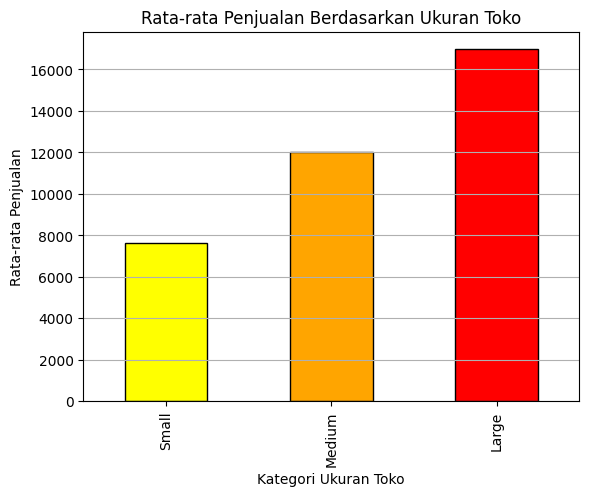

In [ ]:
size_sales = df.groupby('Store_Size_Category')['Weekly_Sales'].mean()
size_sales.plot(kind='bar', color=['yellow', 'orange', 'red'], edgecolor='black')
plt.title("Rata-rata Penjualan Berdasarkan Ukuran Toko")
plt.xlabel("Kategori Ukuran Toko")
plt.ylabel("Rata-rata Penjualan")
plt.grid(axis='y')
plt.show()

# MODEL

In [ ]:
from cuml.ensemble import RandomForestRegressor
from cuml.metrics import mean_squared_error as cuml_mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']].values  # Fitur
y = df['Weekly_Sales'].values  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = cuml_mse(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Mean Squared Error (MSE): 37758296.63
R-squared (R2 Score): 0.83


In [ ]:
sales_range = y.max() - y.min()

print(f"Rentang nilai Weekly_Sales: {sales_range:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Rentang nilai Weekly_Sales: 52148.00
Mean Squared Error (MSE): 37758296.63


In [ ]:
import numpy as np

mse = 37758296.63
range_weekly_sales = 52148.00

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung Relative RMSE
relative_rmse = (rmse / range_weekly_sales) * 100

# Menampilkan hasil
print(f"RMSE: {rmse:.2f}")
print(f"Relative RMSE: {relative_rmse:.2f}%")

RMSE: 6144.78
Relative RMSE: 11.78%


In [ ]:
from cuml.ensemble import RandomForestRegressor as cumlRF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import contextlib

# Menyembunyikan output yang tidak diinginkan
with open(os.devnull, "w") as fnull:
    with contextlib.redirect_stdout(fnull):
        import cuml

df['Days_Since_Start'] = (df['Year'] - df['Year'].min()) * 365 + df['Month'] * 30 + df['Day']
df['Dept_Size_Interaction'] = df['Dept'] * df['Size']

X = df[['Dept', 'Size', 'Dept_Size_Interaction', 'CPI', 'Unemployment']].values
y = df['Weekly_Sales'].values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV untuk cuML RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

def create_cuml_rf_model(**params):
    return cumlRF(random_state=42, **params)

# GridSearchCV untuk cuML
grid_search_rf = GridSearchCV(
    estimator=create_cuml_rf_model(),  # cuML RandomForest
    param_grid=param_grid,
    cv=3,  # Cross-validation
    scoring='neg_mean_squared_error',
    verbose=0,  # Nonaktifkan verbose output
    n_jobs=-1
)

# Latih GridSearchCV dan sembunyikan output
with open(os.devnull, "w") as fnull:
    with contextlib.redirect_stdout(fnull):
        grid_search_rf.fit(X_train, y_train)

# Model Terbaik
model_rf = grid_search_rf.best_estimator_

# Prediksi
y_pred_rf = model_rf.predict(X_test)

# Evaluasi
mse_rf = cuml_mse(y_test, y_pred_rf)  # Menggunakan cuML MSE
r2_rf = 1 - (mse_rf / y_test.var())  # Menghitung R² manual jika cuML tidak menyediakan r2_score

# Tampilkan hasil evaluasi
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
81 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error (MSE): 29243200.27
R-squared (R2 Score): 0.87


In [ ]:
min_value = np.min(y_test)
max_value = np.max(y_test)
value_range = max_value - min_value  # Rentang nilai

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Menghitung Relative RMSE
relative_rmse = (rmse / value_range) * 100  # Dalam persentase

# Menampilkan hasil
print(f"Minimum Value: {min_value:.2f}")
print(f"Maximum Value: {max_value:.2f}")
print(f"Range: {value_range:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Relative RMSE: {relative_rmse:.2f}%")

Minimum Value: -1750.00
Maximum Value: 47159.00
Range: 48909.00
Root Mean Squared Error (RMSE): 5407.70
Relative RMSE: 11.06%


In [ ]:
# Prediksi pada data training
y_train_pred_rf = model_rf.predict(X_train)

# Hitung metrik evaluasi untuk data training
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Hitung metrik evaluasi untuk data testing
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_pred_rf)

# Tampilkan hasil evaluasi
print("Training Performance:")
print(f"  Mean Squared Error (MSE): {mse_train_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_train_rf:.2f}")
print(f"  R-squared (R2): {r2_train_rf:.2f}")

print("\nTesting Performance:")
print(f"  Mean Squared Error (MSE): {mse_test_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_test_rf:.2f}")
print(f"  R-squared (R2): {r2_test_rf:.2f}")

# Analisis overfitting
tolerance = 0.1  # Batas toleransi perbedaan antara training dan testing R²
if abs(r2_train_rf - r2_test_rf) > tolerance:
    print("\nWarning: Potential overfitting detected!")
else:
    print("\nNo significant overfitting detected.")

Training Performance:
  Mean Squared Error (MSE): 23257341.99
  Root Mean Squared Error (RMSE): 4822.59
  R-squared (R2): 0.89

Testing Performance:
  Mean Squared Error (MSE): 29243200.27
  Root Mean Squared Error (RMSE): 5407.70
  R-squared (R2): 0.87

No significant overfitting detected.
